# Goal: 

Plot Mobile Clicks Over Time
<br>Null hypothesis: There is no change in click frequencies over time
<br>*Should be noted that clicks will likely decrease over time anyway because of dropout...solution...look at individual user clicks

***What have I done below?***
<br>-created dataframe with relevant fields (including time, excluding NaN values)
<br>-converted time to a string 
<br>-counted number of clicks for a specified number of top users PER WEEK
<br>-plotted usage over weeks
<br>***What can we (gently) conclude from the data?***
<br>-no immediate patterns stick out in the first 10 users
<br>-big outlier...probs course administrator
<br>-the top mobile users do use mobile most weeks (at least for the first 9 weeks)(course is 9 weeks)
<br>-there is generally no steady decline or sudden drop off 
<br>***Any issues?***
<br>-original issues were resolved! 
<br>-now want to do the things below (and also clean notebooks)
<br>-I want to plot a single user's mobile and non_mobile usage over time, right now it's just mobile (started this... and look at all)
<br>-I also want to look at event clicks as a fraction of total clicks (sep notebook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime
from sklearn import preprocessing
from no_PII_Storage_folder import *

datetimeFormat = '%Y-%m-%d %H:%M:%S.%f %Z'

In [2]:
%run all_utilities.ipynb
#all functions are in this notebook

In [3]:
user_data_org = pd.read_csv(r'\ALL_DATA.csv')
mobile_data_org = pd.read_csv(r'MOBILE_DATA.csv')
non_mobile_data_org = pd.read_csv(r'NON_MOBILE_DATA.csv')

user_data_org = user_data_org.drop(['Unnamed: 0'], axis = 1)
mobile_data_org = mobile_data_org.drop(['Unnamed: 0'], axis = 1)
non_mobile_data_org = non_mobile_data_org.drop(['Unnamed: 0'], axis = 1)

In [4]:
user_data = user_data_org
mobile_data = mobile_data_org
non_mobile_data = non_mobile_data_org

# print(user_data_org.isna().any())
# print(user_data_org.isnull().any())

user_data = user_data.dropna()
user_data = user_data.reset_index(drop=True)
mobile_data = mobile_data.dropna()
mobile_data = mobile_data.reset_index(drop=True)
non_mobile_data = non_mobile_data.dropna()
non_mobile_data = non_mobile_data.reset_index(drop=True)
assert (len(user_data) - len(non_mobile_data)) == (len(mobile_data))
print(len(user_data))

3329792


In [5]:
#finalizes mobile and non_mobile dataframes
mobile_data = mobile_data.sort_values(by = "time", ascending = True)
mobile_data = mobile_data.reset_index()

non_mobile_data = non_mobile_data.sort_values(by = "time", ascending = True)
non_mobile_data = non_mobile_data.reset_index()

print(len(mobile_data))
#12/21/2016 - 7/2/2017

56044


In [6]:
#find top MOBILE users
NUM_TOP = 15
#no nan because lots of nans in names????
data_copy  = mobile_data.dropna()
data_copy = data_copy.reset_index(drop=True)

top_users = get_top_users(data_copy, NUM_TOP)
top_users = top_users.drop(['index'], axis = 1)
top_users.head(NUM_TOP)

,username,no. clicks
0,9589599fce0cecbe02eb2b02457b1ef6,2838
1,3693313ce79182c3009e6414b3ade459,2471
2,d39491d5e973c40e3b1e5957cce823ee,1893
3,d41d8cd98f00b204e9800998ecf8427e,1381
4,bed7f1f1761c5368859d1421fcb4e013,1239
5,eb97b8fc1faff95a146c939d4316d24c,991
6,e50c955be3a9f25261169e3298e939a3,893
7,bb2d33a5636b647b21518bdb00c55cbf,891
8,dc9ffb87732c5ead8c371e11d544642f,771
9,2a706bae2ec9c72ebcf03154e84cea77,764


In [7]:
#create dataframe if mobile data that ONLY contains data from the top users
temp = pd.DataFrame()
top_user = pd.DataFrame()

for count in range(len(top_users)):
    temp = mobile_data[mobile_data['username'].str.contains(top_users['username'][count])]
    top_user = pd.concat([temp, top_user], axis = 0, sort = False)

print(len(top_user))
top_user = top_user.reset_index(drop = True)
top_user.head(2)

17402


,index,time,username,event_source,agent,name
0,45907,2017-03-18 07:11:28.699383 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,edx.ui.lms.sequence.next_selected
1,45906,2017-03-18 07:11:30.021024 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,page_close


In [8]:
copy_top = convert_time(top_user)
copy_top.head(2)

No milliseconds count: 0


,index,time,username,event_source,agent,name,timestamp
8819,36177,2016-12-22 04:27:26.225144 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,2016-12-22 04:27:26.225144
8820,36241,2016-12-23 03:26:05.270829 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 9.3.5 (B...,edx.course.enrollment.activated,2016-12-23 03:26:05.270829


In [9]:
#creates dataframe to be used for plotting
top_user_week_counts = create_count_df_mobile (copy_top)

print(len(top_user_week_counts))
print(copy_top['username'].nunique())
top_user_week_counts.head(2)

144
15


,username,week_year,count
0,d41d8cd98f00b204e9800998ecf8427e,1/2017,17
1,9589599fce0cecbe02eb2b02457b1ef6,10/2017,172


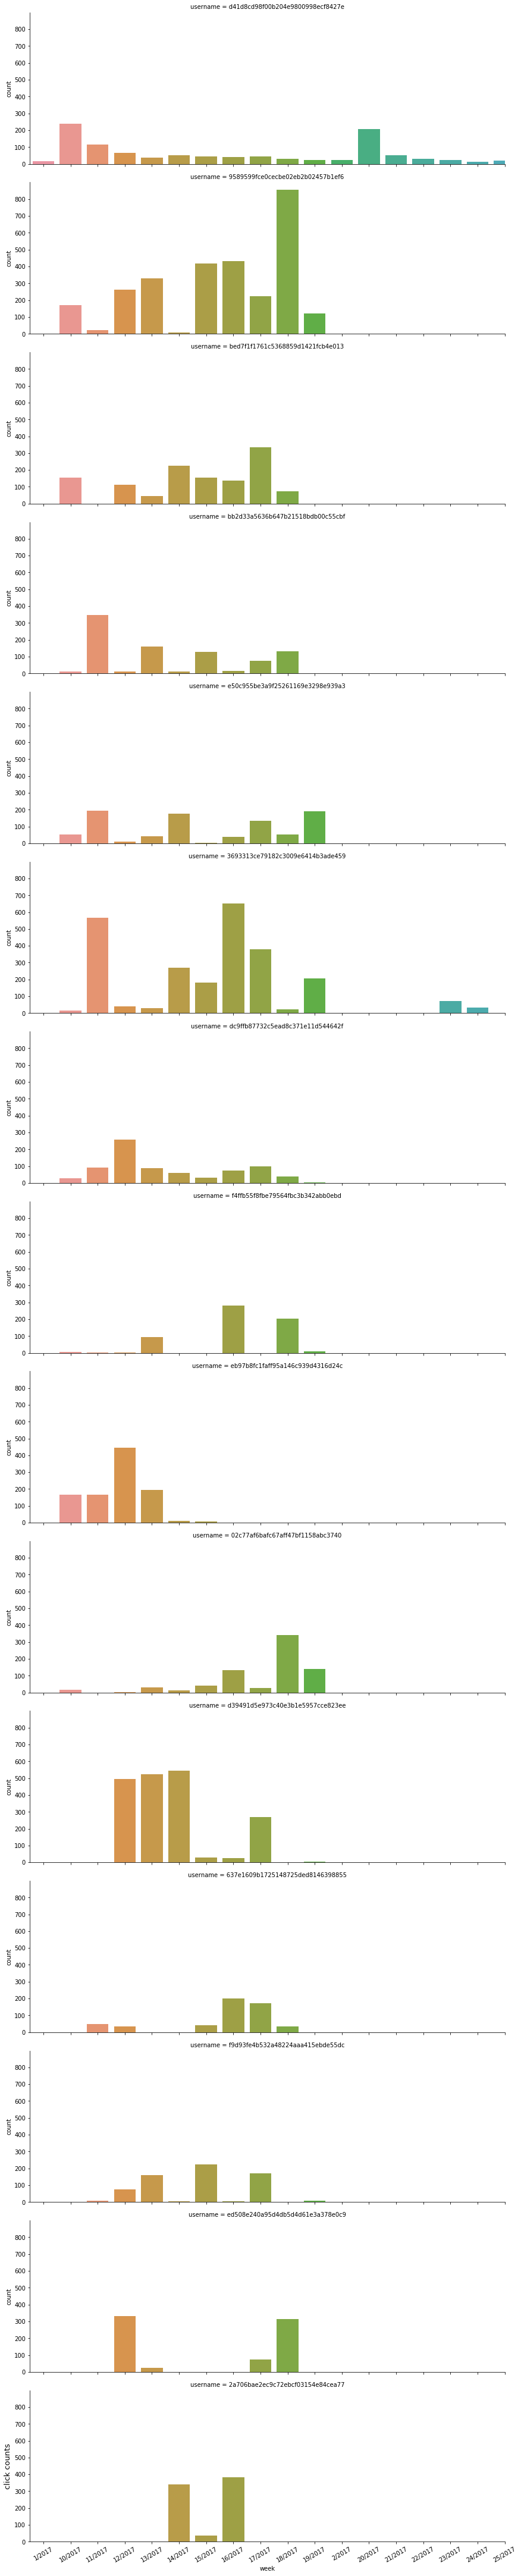

In [10]:
#user d41d8cd98f00b204e9800998ecf8427e is a biggg outlier...course administrator??? 

sns.catplot(x = "week_year", y = "count", col_wrap = 1, 
            col = "username", data = top_user_week_counts, kind = "bar",
            height = 4, aspect = 3)
# plt.title("Counts over time for mobile user " + str(top_user_week_counts['username'][count]), fontsize = 14)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xticks(rotation = 30)
plt.xlim(-.50,17)
plt.show()

In [11]:
#create device column on mobile dataframe
mobile_data_labeled = mobile_data
non_mobile_data_labeled = mobile_data
device_list = []

for count in range(len(mobile_data_labeled)):
     device_list.append('mobile')
mobile_data_labeled['device'] = device_list  

mobile_data_labeled.head(3)

,index,time,username,event_source,agent,name,device
0,36141,2016-12-21 18:38:38.05078 UTC,c92e2ee0a3fcfb553ddf451b2421ef3c,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
1,36177,2016-12-22 04:27:26.225144 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
2,36178,2016-12-22 18:57:49.47778 UTC,5047eadabd5014d2ba50531f8ce12ca2,server,edX/org.edx.mobile (2.7.3; OS Version 10.1.1 (...,edx.course.enrollment.activated,mobile


In [12]:
#create device column on non_mobile dataframe
non_mobile_data_labeled = non_mobile_data
non_mobile_data_labeled = non_mobile_data
device_list = []

for count in range(len(non_mobile_data_labeled)):
     device_list.append('non_mobile')
non_mobile_data_labeled['device'] = device_list  

#non_mobile_data_labeled.head(3)

In [13]:
#concatenate both data frames
top_users_labeled = pd.concat([mobile_data_labeled, non_mobile_data_labeled], axis = 0, sort = False)
top_users_labeled = top_users_labeled.reset_index(drop = True)

#top_users_labeled.head(2)

In [14]:
#use ONLY top users

temp = pd.DataFrame()
top_user_labeled__num = pd.DataFrame()

for count in range(len(top_users)):
    temp = top_users_labeled[top_users_labeled['username'].str.contains(top_users['username'][count]) & ~top_users_labeled['username'].str.contains('d41d8cd98f00b204e9800998ecf8427e')]
    top_user_labeled__num = pd.concat([temp, top_user_labeled__num], axis = 0, sort = False)

print(len(top_user_labeled__num))
top_user = top_user.drop(['index'], axis = 1)
top_user_labeled__num = top_user_labeled__num.reset_index(drop = True)
top_user_labeled__num.head(2)

64355


,index,time,username,event_source,agent,name,device
0,45907,2017-03-18 07:11:28.699383 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,edx.ui.lms.sequence.next_selected,mobile
1,45906,2017-03-18 07:11:30.021024 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,page_close,mobile


In [15]:
copy_top_users_labeled = convert_time(top_user_labeled__num)
copy_top_users_labeled.head(2)

No milliseconds count: 1


,index,time,username,event_source,agent,name,device,timestamp
45533,36912,2017-03-07 14:13:50.355567 UTC,e50c955be3a9f25261169e3298e939a3,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,edx.ui.lms.link_clicked,mobile,2017-03-07 14:13:50.355567
45534,36636,2017-03-07 14:13:51.657434 UTC,e50c955be3a9f25261169e3298e939a3,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,page_close,mobile,2017-03-07 14:13:51.657434


In [16]:
# create dataframe for plotting
all_top_users = create_count_df_user(copy_top_users_labeled)

print(len(copy_top_users_labeled))
print(copy_top_users_labeled['username'].nunique())
all_top_users.head(2)

64355
14


,username,device,week_year,count
0,3693313ce79182c3009e6414b3ade459,mobile,10/2017,14
1,e50c955be3a9f25261169e3298e939a3,mobile,10/2017,51


Blue = mobile, Orange = non_mobile


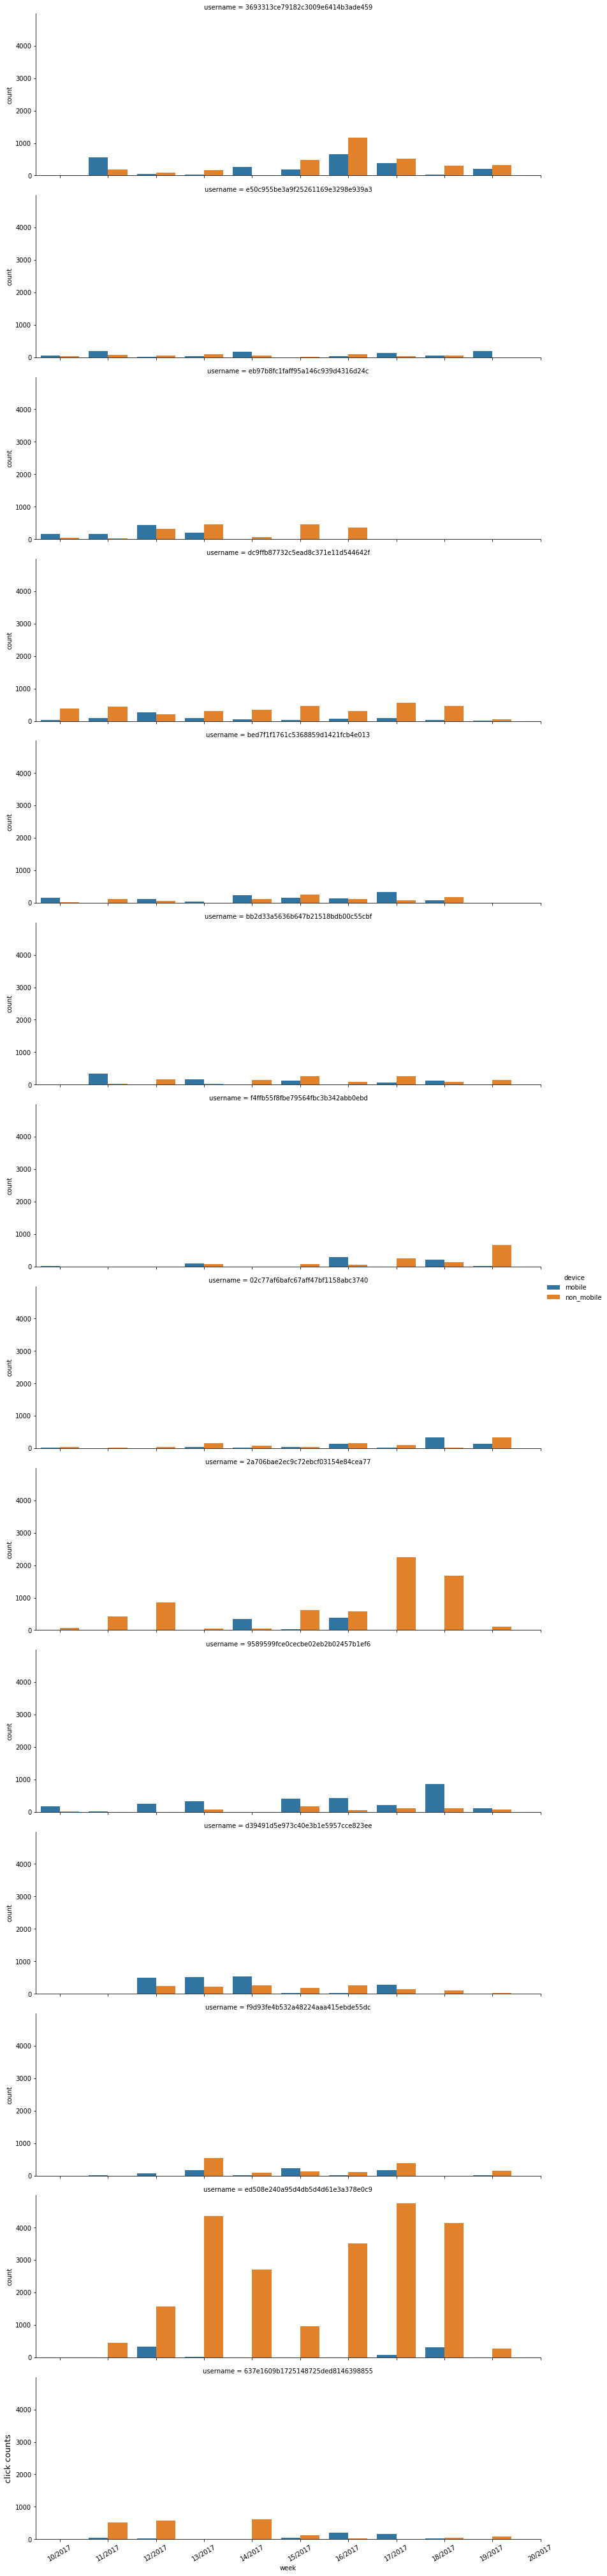

In [17]:
print("Blue = mobile, Orange = non_mobile")
sns.catplot(x = "week_year", y = "count", col_wrap = 1, hue =  'device', 
            col = "username", data = all_top_users, kind = "bar",
            height = 4, aspect = 3)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xticks(rotation = 30)
plt.xlim(-.50,10)
plt.show()

# Conclusions from above plots

<br>-top mobile users do not solely use mobile device
<br>-(correlation) top mobile users appear less likely to drop out of the course
<br>-some, but not all, of users show a trend of increased non_mobile usage as time progresses